In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import regionmask
import regionmask.defined_regions as rm
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import geopandas as gp
import cartopy

### Part 1: Chinese Provinces

In [49]:
df = load_jhu_df()
df.head()

province_names = df[df['Country/Region'] == 'Mainland China']['Province/State'].unique()
province_names = [province for province in provinces.names if province in province_names]

['Xinjiang', 'Gansu', 'Yunnan', 'Heilongjiang', 'Jilin', 'Liaoning', 'Guangxi', 'Guangdong', 'Hainan', 'Fujian', 'Zhejiang', 'Shanghai', 'Jiangsu', 'Shandong', 'Hebei', 'Tianjin', 'Beijing', 'Sichuan', 'Chongqing', 'Guizhou', 'Hunan', 'Ningxia', 'Shaanxi', 'Qinghai', 'Shanxi', 'Jiangxi', 'Henan', 'Hubei', 'Anhui']


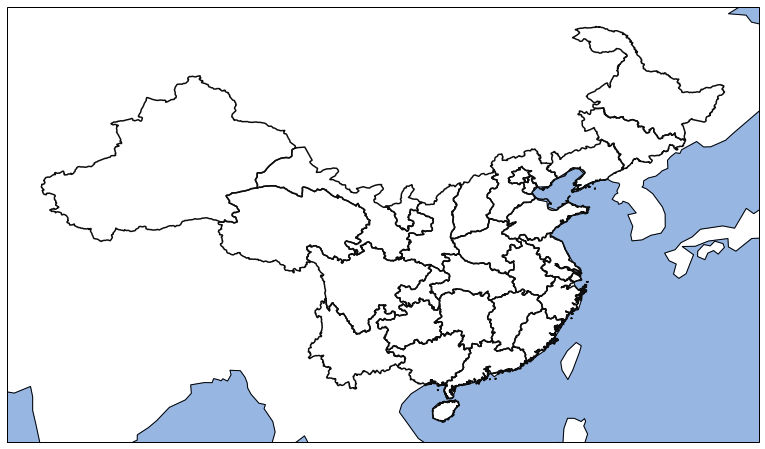

In [50]:
provinces = regionmask.defined_regions.natural_earth.states_provinces_10
provinces = provinces[province_names]
print(provinces.names)
provinces.plot(add_label=False);

In [52]:
ds = xr.open_dataset('../data/daily_spec_humidity_2020.nc')
provinces_mask = provinces.mask(ds['longitude'], ds['latitude'], wrap_lon=True)
provinces_ma = np.ma.masked_invalid(provinces_mask)

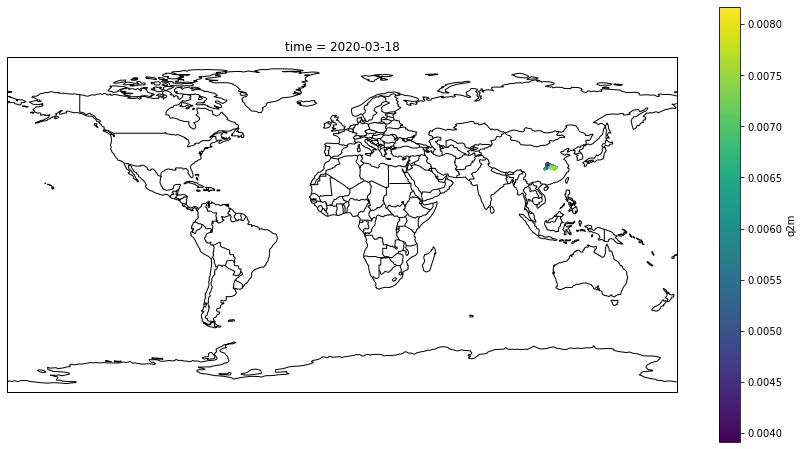

In [53]:
province = 'Hubei'
ax = plt.axes(projection=cartopy.crs.PlateCarree())
(ds['q2m'].where(provinces_ma == provinces[province].number)).isel(time=-1).plot(ax = ax)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.add_feature(cartopy.feature.COASTLINE)

Text(0.5, 1.0, 'Average specific humidity in Hubei in 2020')

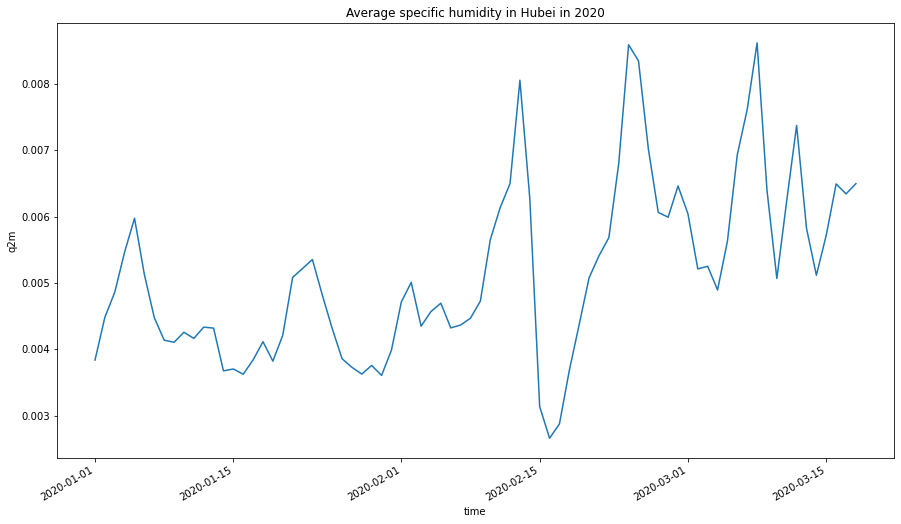

In [54]:
(ds['q2m'].where(provinces_ma == provinces[province].number)).mean(dim=['latitude', 'longitude']).plot()
plt.title(f"Average specific humidity in {province} in 2020")